<a href="https://colab.research.google.com/github/tseykoroman/ML_for_business/blob/main/Tseyko_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 2. Профилирование пользователей. Сегментация аудитории: unsupervised learning (clustering, LDA/ARTM), supervised (multi/binary classification)#

### Переходим к практике


Вспомним, какие задачи перед нами стоят:
Основная - представление характеристик пользователя по списку статей, которые он читал.
1. Взять статьи и превратить их в темы.
2. Взять темы и превратить их в вектор, описывающий пользователя.


In [40]:
import pandas as pd

Наши новости

In [36]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR" -O articles.csv && rm -rf /tmp/cookies.txt 

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
news = pd.read_csv("C:/articles.csv")
print(news.shape)
news.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


In [42]:
news.iloc[0]['title']

'Заместитель председателяnправительства РФnСергейnИвановnизбран председателем советаnПБК ЦСКАn. Как сообщаетnпресс-службаnармейцев, такое решение было единогласно принято на первом заседании совета клуба. Основной функцией этого органа будет обсуждение текущего состояния, планирование и утверждение стратегии развития клуба на ближайшую перспективу.nnВ состав совета вошли:nГеоргий Полтавченкоn(полномочный представитель президента в Центральном федеральном округе),nАлексей Седовn(генерал-полковник, начальник службы по защите конституционного строя и борьбе с терроризмомnФСБ РФn),nАлександр Новакn(заместитель министра финансов РФ),nВячеслав Полтавцевn(заместитель генерального директора, руководитель блока по взаимодействию с органами власти, социальной и корпоративной политикиnГМК «Норильский никель»n),nЛеонид Исаковичn(генеральный директор ООО «УК «Спортивные проекты»),nОльга Плешаковаn(генеральный директорn«Трансаэро»n),nАлександр Провоторовn, (генеральный директорnОАО «Ростелеком»n), А

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a' -O users_articles.csv

--2022-03-26 19:40:02--  https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a
Resolving drive.google.com (drive.google.com)... 142.251.8.100, 142.251.8.113, 142.251.8.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hhp1nf4fdqbp2qvoai87ijrvouf0fplk/1648323600000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download [following]
--2022-03-26 19:40:03--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hhp1nf4fdqbp2qvoai87ijrvouf0fplk/1648323600000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.goo

Загрузим пользователей и списки последних прочитанных новостей

In [43]:
users = pd.read_csv("C:/users_articles.csv")
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


Итак, нам нужно получить векторные представления пользователей на основе прочитанным ими новостей и самих новостей

### 1. Получаем векторные представления новостей

**ПОЗАВТРАКАЛИ**

Стемминг (убираем лишнии куски слова):
**завтрак**<br>
Очень быстро, очень дешево и очень слабо.

Лемматизация (перевод в неопределенную форму для гл. и в им.падеж для сущ.):
**завтракать**<br>
Небыстро, сложно.

In [44]:
!pip install razdel pymorphy2 pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=da3befc8a6f14288a44b8ee4d8377827ed656a4b8fe6e50c2ae8bbc54398fa48
  Stored in directory: c:\users\tseyk\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=d920de99105ee7220688e8b5afc08e3be40305513d390b7cfe2caf81f3a663e9
  Stored in directory: c:\users\tseyk\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created w

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [47]:
# предобработка текстов
import re
import numpy as np
from gensim.corpora.dictionary import Dictionary
from razdel import tokenize  # сегментация русскоязычного текста на токены и предложения https://github.com/natasha/razdel
import pymorphy2  # Морфологический анализатор

Не все слова равны, не все слова одинаково работают. К примеру, союзы и предлоги в нашей задачи никак не помогут, поэтому можем их выкидывать. (*Но в задачах оценки стиля, к примеру, такие слова будут очень полезны*)

In [48]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tseyk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [49]:
stopword_ru = stopwords.words('russian')
print(len(stopword_ru))

151


In [50]:
stopword_ru[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c' -O stopwords.txt

--2022-03-26 19:40:39--  https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c
Resolving drive.google.com (drive.google.com)... 64.233.189.100, 64.233.189.101, 64.233.189.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9pp3665792l77om4cs8u2gen9fp22sem/1648323600000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download [following]
--2022-03-26 19:40:39--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9pp3665792l77om4cs8u2gen9fp22sem/1648323600000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs

In [52]:
with open('C:/stopwords.txt', encoding="utf8") as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]
    
stopword_ru += additional_stopwords
len(stopword_ru)

776

In [53]:
stopword_ru[200:210]

['ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам']

In [54]:
def clean_text(text):
    '''
    очистка текста
    
    на выходе очищеный текст
    '''
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    text = re.sub('n', ' ', text)
    
    return text

cache = {}
morph = pymorphy2.MorphAnalyzer()

def lemmatization(text):    
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова

    на выходе лист лемматизированых токенов
    '''

    # [0]
    if not isinstance(text, str):
        text = str(text)
    
    # [1]
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w) > 1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
    
    words_lem_without_stopwords = [i for i in words_lem if not i in stopword_ru] # [6]
    
    return words_lem_without_stopwords

In [55]:
morph = pymorphy2.MorphAnalyzer()
morph.parse('сбегали')[0].normal_form

'сбегать'

In [56]:
news['title'].iloc[:2].apply(lambda x: clean_text(x))

<ipython-input-54-898b573b2830>:14: FutureWarning: Possible nested set at position 39
  text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)


0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
Name: title, dtype: object

In [57]:
%%time
from tqdm import tqdm
tqdm.pandas()

# Запускаем очистку текста. Будет долго...
news['title'] = news['title'].progress_apply(lambda x: clean_text(x))

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|███████████████████████████████████████████████████████████████████████████| 27000/27000 [00:30<00:00, 896.52it/s]


Wall time: 30.2 s


In [58]:
news['title'].iloc[:10]

0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
2    форвард авангарда томаш заборский прокомментир...
3    главный тренер кубани юрий красножан прокоммен...
4    решением попечительского совета владивостокско...
5    ио главного тренера вячеслав буцаев прокоммент...
6    запорожский металлург дома потерпел разгромное...
7    сборная сша одержала победу над австрией со сч...
8    бывший защитник сборной россии дарюс каспарайт...
9    полузащитник цска зоран тошич после победы над...
Name: title, dtype: object

In [59]:
news['title'].iloc[:2].apply(lambda x: lemmatization(x))

0    [заместитель, председатель, правительство, рф,...
1    [матч, финал, кубок, россия, футбол, приостано...
Name: title, dtype: object

In [60]:
%%time
# Запускаем лемматизацию текста. Будет очень долго...
news['title'] = news['title'].progress_apply(lambda x: lemmatization(x))

100%|███████████████████████████████████████████████████████████████████████████| 27000/27000 [03:31<00:00, 127.41it/s]

Wall time: 3min 31s


А теперь в 3 строчки обучим нашу модель

In [61]:
# сформируем список наших текстов
texts = list(news['title'].values)

# Создадим корпус из списка с текстами
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

Запускаем обучение

In [142]:
N_topic = 40

In [143]:
%%time
from gensim.models import LdaModel

# Обучаем модель на корпусе
lda = LdaModel(common_corpus, num_topics=N_topic, id2word=common_dictionary, passes=10)

Wall time: 9min 19s


In [144]:
from gensim.test.utils import datapath

# Сохраняем модель на диск
temp_file = datapath("model.lda")
lda.save(temp_file)

In [145]:
# Загружаем обученную модель с диска
lda = LdaModel.load(temp_file)

In [146]:
# Создаем новый корпус документов, которые раньше не видели
other_texts = list(news['title'].iloc[:3])
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[2]
print(other_texts[2])
lda[unseen_doc] 

['форвард', 'авангард', 'томаш', 'заборский', 'прокомментировать', 'игра', 'команда', 'матч', 'чемпионат', 'кхл', 'против', 'атланта', 'плохой', 'матч', 'нижний', 'новгород', 'против', 'торпедо', 'настраиваться', 'первый', 'минута', 'включиться', 'заборский', 'получиться', 'забросить', 'быстрый', 'гол', 'задать', 'хороший', 'темп', 'поединок', 'играть', 'хороший', 'сторона', 'пять', 'очко', 'выезд', 'девять', 'хороший']


[(2, 0.14447911),
 (11, 0.032442573),
 (20, 0.57821155),
 (25, 0.13704644),
 (26, 0.056121662),
 (28, 0.029286627)]

Обучили модель. Теперь 2 вопроса:

1. как выглядят наши темы
2. как получить для документа вектор значений (вероятности принадлежности каждой теме)

In [147]:
x = lda.show_topics(num_topics=N_topic, num_words=7, formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

# Печатаем только слова
for topic, words in topics_words:
    print(f"topic_{topic}: " + " ".join(words))

topic_0: всё очень большой ru сделать первый газета
topic_1: белоруссия бизнесмен белорусский компьютерный минск музыка золото
topic_2: сезон миллиард отдых клуб контракт звонок зима
topic_3: ребёнок школа следствие родитель детский мальчик девочка
topic_4: опубликовать статья информация источник связь депутат проверка
topic_5: женщина мужчина жизнь смерть врач семья возраст
topic_6: военный сила операция оборона боевой территория российский
topic_7: газ район произойти помощь пострадать место данные
topic_8: млн цена ставка объём составить стоимость сумма
topic_9: научный наука проект академия развитие директор завод
topic_10: планета час обнаружить звезда высота скорость метр
topic_11: рост рынок банк рубль уровень экономика снижение
topic_12: сша американский выяснить американец вашингтон удар америка
topic_13: участник день мероприятие участие сайт праздник программа
topic_14: армия советский область ссср рф начальник городской
topic_15: мозг лечение автор страдать al atio джон
top

Очень неплохо - большинство тем вполне можно описать о чем они

Давайте напишем функцию, которая будет нам возвращать векторное представление новости

In [148]:
def get_lda_vector(lda, text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]

    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(N_topic):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [149]:
get_lda_vector(lda, news['title'].iloc[0])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04283297,
       0.        , 0.05506551, 0.        , 0.        , 0.61486042,
       0.        , 0.05377868, 0.        , 0.        , 0.01000177,
       0.11073722, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02025606,
       0.        , 0.        , 0.        , 0.        , 0.0844603 ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [150]:
%%time
topic_matrix = pd.DataFrame([get_lda_vector(lda, text) for text in news['title'].values])
topic_matrix.columns = [f'topic_{i}' for i in range(N_topic)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+[f'topic_{i}' for i in range(N_topic)]]
topic_matrix.head(5)

Wall time: 41 s


,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39
0,6,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.084399,0.0,0.00000,0.0,0.0,0.000000
1,4896,0.000000,0.0,0.000000,0.0,0.044677,0.0,0.000000,0.0,0.0,...,0.0,0.212049,0.000000,0.0,0.000000,0.0,0.03459,0.0,0.0,0.000000
2,4897,0.000000,0.0,0.144456,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000
3,4898,0.258948,0.0,0.058734,0.0,0.000000,0.0,0.148037,0.0,0.0,...,0.0,0.000000,0.029833,0.0,0.062628,0.0,0.00000,0.0,0.0,0.000000
4,4899,0.113569,0.0,0.250967,0.0,0.126702,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.264106,0.0,0.00000,0.0,0.0,0.030142


In [151]:
topic_matrix.head()

,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39
0,6,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.084399,0.0,0.00000,0.0,0.0,0.000000
1,4896,0.000000,0.0,0.000000,0.0,0.044677,0.0,0.000000,0.0,0.0,...,0.0,0.212049,0.000000,0.0,0.000000,0.0,0.03459,0.0,0.0,0.000000
2,4897,0.000000,0.0,0.144456,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000
3,4898,0.258948,0.0,0.058734,0.0,0.000000,0.0,0.148037,0.0,0.0,...,0.0,0.000000,0.029833,0.0,0.062628,0.0,0.00000,0.0,0.0,0.000000
4,4899,0.113569,0.0,0.250967,0.0,0.126702,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.264106,0.0,0.00000,0.0,0.0,0.030142


Прекрасно, мы получили вектора наших новостей! И даже умеем интерпретировать получившиеся темы.

Можно двигаться далее

### Следующий шаг - векторные представления пользователей

In [152]:
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


In [153]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[[f'topic_{i}' for i in range(N_topic)]].values))

In [154]:
def get_user_embedding_mean(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.mean(user_vector, 0)
    return user_vector

def get_user_embedding_median(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.median(user_vector, 0)
    return user_vector

def get_user_embedding_max(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.max(user_vector, 0)
    return user_vector    

In [155]:
!wget 'https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK' -O users_churn.csv

### Рассчитаем Precision, Recall, F_score

In [156]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [157]:
def score_with_user_embedding(func, func_name):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    import itertools
    from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

    user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: func(x), 1)])
    user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
    user_embeddings['uid'] = users['uid'].values
    user_embeddings = user_embeddings[['uid'] + [f'topic_{i}' for i in range(N_topic)]]

    X = pd.merge(user_embeddings, target, 'left')

    #разделим данные на train/test
    X_train, X_test, y_train, y_test = train_test_split(
    X[[f'topic_{i}' for i in range(N_topic)]], X['churn'], random_state=0)
    
    logreg = LogisticRegression()

    #обучим наш пайплайн
    logreg.fit(X_train, y_train)

    #наши прогнозы для тестовой выборки
    preds = logreg.predict_proba(X_test)[:, 1]

    #график
    n = 50
    plt.figure(figsize=(10, 6))
    plt.plot(preds[:n], label='predict')
    plt.plot(y_test.values[:n], label='true')
    plt.title(f'ответ модели {func_name}')
    plt.xlabel('№ примера')
    plt.ylabel('выход')
    plt.legend()
    plt.grid('On')
    plt.show()    

    # Рассчитаем Precision, Recall, F_score, roc_auc_score
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    roc_auc_score = roc_auc_score(y_test, preds)


    # confusion matrix    
    font = {'size' : 15}
    plt.rc('font', **font)
    cnf_matrix = confusion_matrix(y_test, preds > thresholds[ix])
    plt.figure(figsize=(10, 8))
    plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'], title=f'Confusion matrix for model {func_name}')
    plt.savefig("conf_matrix.png")
    plt.show()  


    return round(thresholds[ix], 4), round(fscore[ix], 4), round(precision[ix], 4), round(recall[ix], 4), round(roc_auc_score, 4)

In [158]:
target = pd.read_csv("C:/users_churn.csv")

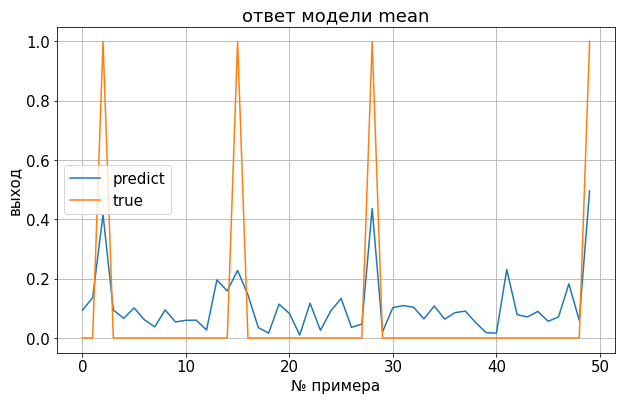

Confusion matrix, without normalization
[[1668   87]
 [  32  213]]


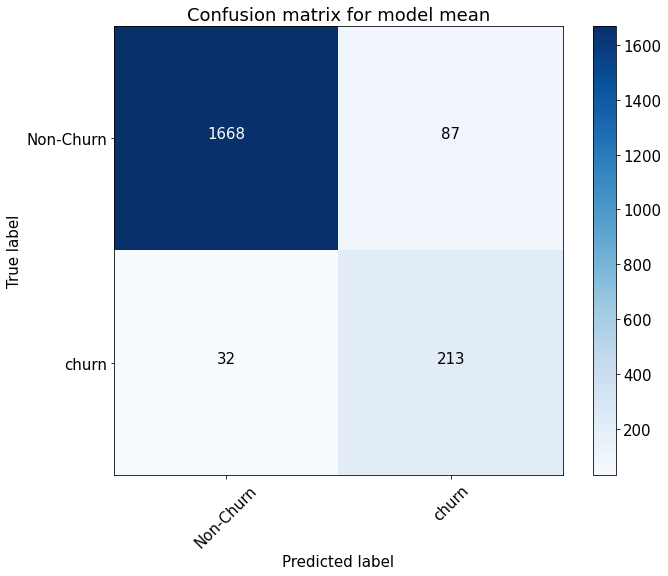

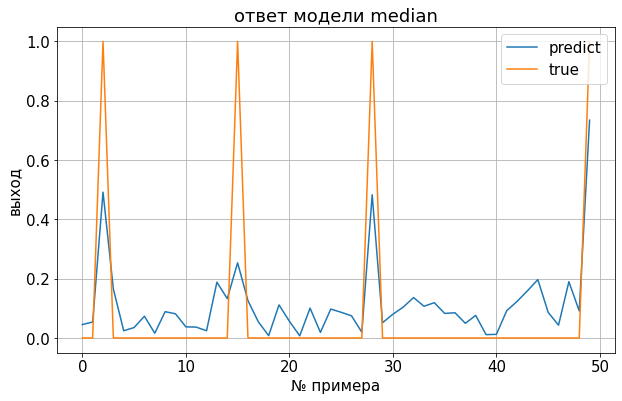

Confusion matrix, without normalization
[[1702   53]
 [  30  215]]


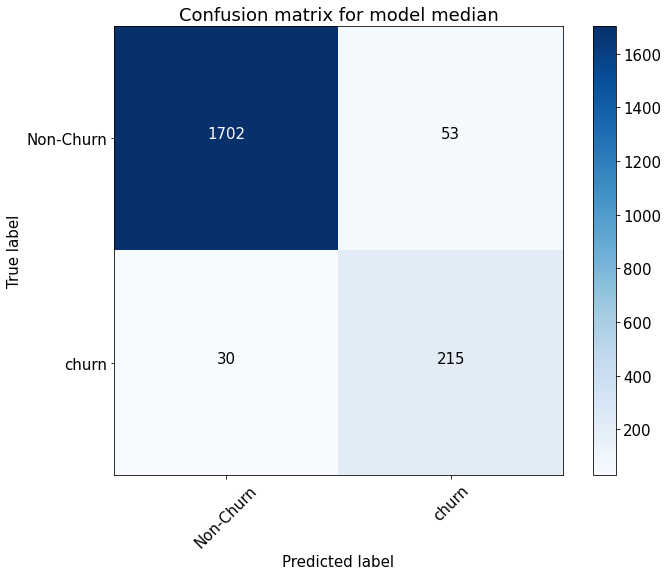

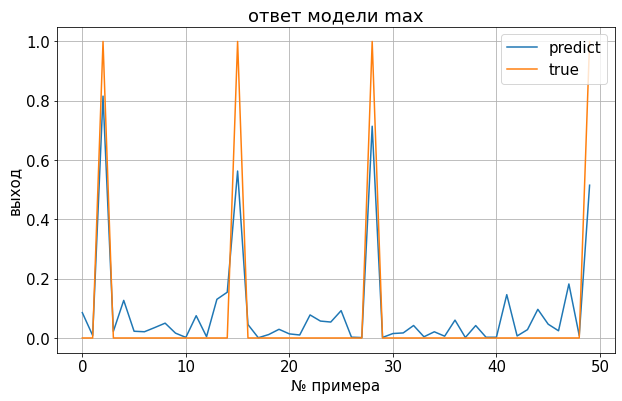

Confusion matrix, without normalization
[[1731   24]
 [  32  213]]


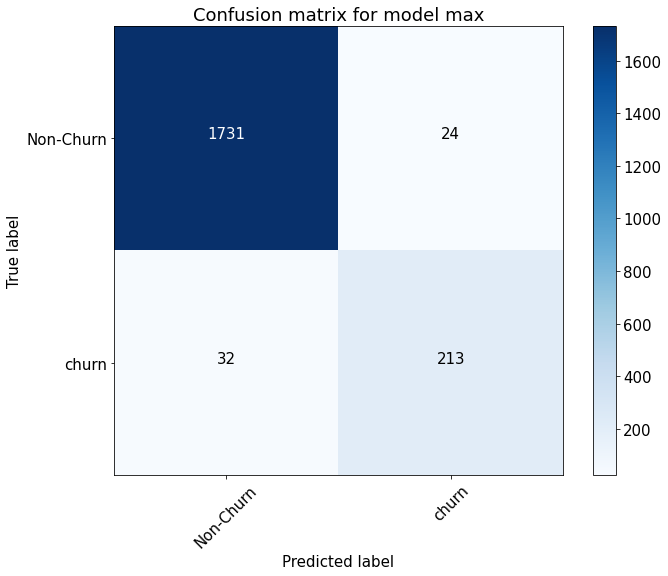

In [160]:
results = pd.DataFrame(np.array([
    score_with_user_embedding(func=get_user_embedding_mean, func_name='mean'),
    score_with_user_embedding(func=get_user_embedding_median, func_name='median'),
    score_with_user_embedding(func=get_user_embedding_max, func_name='max')
]), columns=['Best Threshold', 'F-Score', 'Precision', 'Recall', 'ROC AUC score'])

results['func'] = ['mean', 'median', 'max']
results = results.set_index('func')

In [161]:
results

,Best Threshold,F-Score,Precision,Recall,ROC AUC score
func,,,,,
mean,0.2265,0.7839,0.7110,0.8735,0.9737
median,0.2502,0.8405,0.8030,0.8816,0.9844
max,0.3626,0.8861,0.8992,0.8735,0.9920


Судя по цифрам, самый эффективный способ - через max. 
Возможные причины - разброс в интересах пользователя становится меньше, интересы как-бы более узкие, но более точные.

## Домашнее задание

1. *Самостоятельно повторить tfidf (документация https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог)
3. Повторить п.2, но используя уже не медиану, а max
4. *Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (взяв список новостей пользователя)
    - подсказка 1: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал
    - подсказка 2: нужен именно idf, как вес.
5. Сформировать на выходе единую таблицу, сравнивающую качество 2/3 разных метода получения эмбедингов пользователей: median, max, idf_mean по метрикам roc_auc, precision, recall, f_score
6. Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

## Дополнительные ссылки

1. http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf
2. https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation
3. http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/